# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     627.5
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           2.62e-37
Time:                        14:05:21   Log-Likelihood:                -9.1135
No. Observations:                  50   AIC:                             26.23
Df Residuals:                      46   BIC:                             33.88
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9237      0.103     47.721      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.4301088   4.91209037  5.35455795  5.72998763  6.02078872  6.2221939
  6.34304241  6.40432783  6.43574889  6.47083005  6.54141352  6.67242767
  6.87779139  7.15812724  7.50065917  7.88131158  8.26866489  8.62911768
  8.93240731  9.15658196  9.29160729  9.34101506  9.32132282  9.25932016
  9.18766726  9.1395289   9.14312558  9.21709699  9.36743953  9.58652116
  9.85433528 10.14178779 10.41547715 10.64318216 10.79915583 10.86835552
 10.84891439 10.75244815 10.60214662 10.42896369 10.26653171 10.14563576
 10.08915578 10.10830744 10.20079945 10.35120999 10.53352051 10.71539047
 10.8634708  10.94888308]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.94030339 10.79859322 10.54355808 10.22033227  9.8883284   9.60669109
  9.41981637  9.34648192  9.37524966  9.46726619]


## Plot comparison

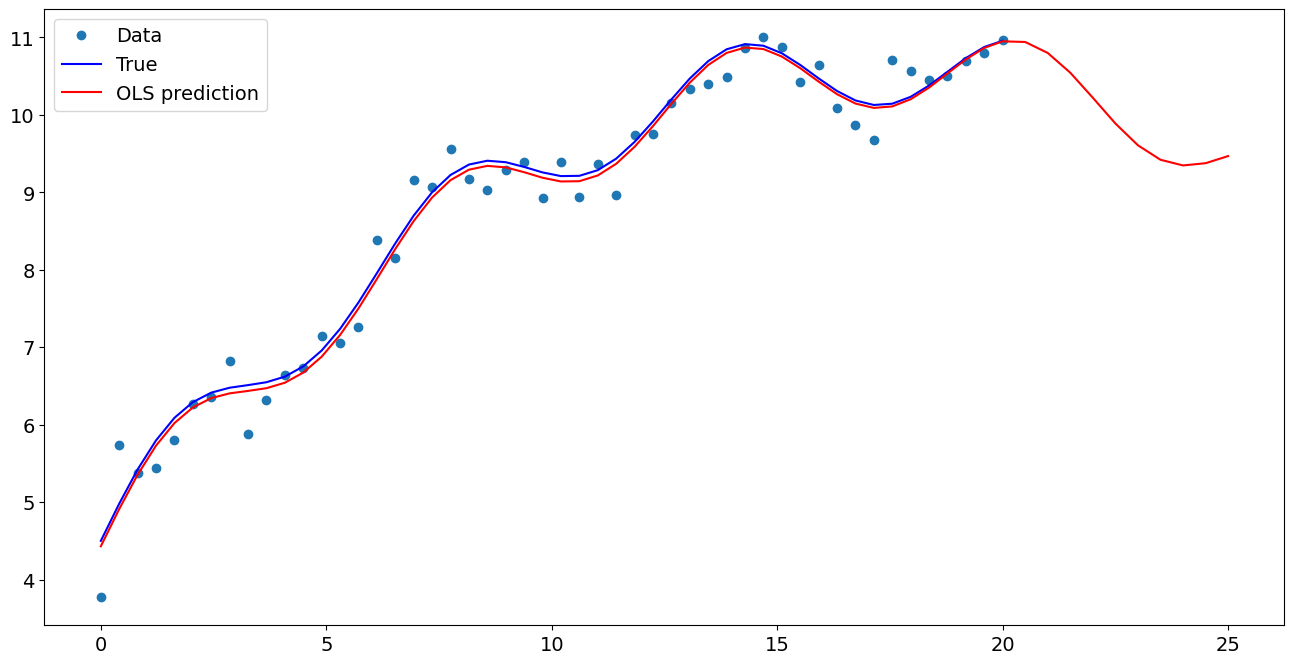

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.923735
x1                  0.500336
np.sin(x1)          0.505034
I((x1 - 5) ** 2)   -0.019745
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.940303
1    10.798593
2    10.543558
3    10.220332
4     9.888328
5     9.606691
6     9.419816
7     9.346482
8     9.375250
9     9.467266
dtype: float64